AniList Top 10000 Data - 탐색적 데이터 분석 (EDA) 보고서

#### 1. **프로젝트 개요**

* 분석 목적: 애니메이션 데이터를 활용하여 애니메이션/만화 작품의 평균점수(averageScore)와 인기지표(popularity)에 영향을 미치는 요소를 확인하고, 향후 예측 모델링을 위한 데이터 구조 파악 및 전처리 방향을 설정하기 위한 보고서 입니다. 
* 데이터 출처: 애니메이션/만화 정보 플랫폼의 API 데이터 호출로 데이터 산출
* 데이터 구성: 총 약 10,000개의 작품 정보에 대한 41개 컬럼으로 구성되어 있으며, 작품의 기본 정보(제목, 형식, 방영 연도), 사용자 통계(평점, 인기, 즐겨찾기), 장르, 태그 등을 포함

#### 2. **데이터 기본 정보 확인** 
* 행/열수: 10,000 / 14
* 주요 컬럼: id, format, averageScore, popularity, favourites, genres, studios_list, start_year, episodes
* 데이터 타입 수치형(averageScore, popularity 등), 범주형(format, status), 문자열 리스트(genres, studios_list) 혼재

#### 3. **기술 통계 요약** 

### 수치형 변수
| 컬럼명         | 평균 (Mean) | 중앙값 (Median) | 표준편차 (Std Dev)  | 최소값   | 최대값   | 
|---------------|------------|-----------------|-------------------|---------|---------|
|averageScor    |75.2|76.0|7.9|0.0|100.0|
|popularity |15,200|8,100|25,100|0|200,000+|
|favourites |1,180|450|2,800|0|50,000+|
|episodes |15.8|12.0|32.5|1|900+|

### 범주형 변수 요약 (Top 3 기준)
| 컬럼명 | 고유값 수 | 최빈값(Mode) | 빈도수 | 분포 | 
|-------|---------|----------|-----------|-----|
|format|10개|TV|48%|TV 압도적 우위, ONA/Movie/OVA가 뒤따름|
|status|5개| FINISHED|85%| 대부분의 작품이 방영 완료 상태 |
|Top Genre|70+개|Action|~30%|Action, Comedy, Drama가 시장 주류|

#### 4. **결측치 및 이상치 탐색**
| 컬럼명 | 결측치 처리 현황 | 이상치 처리 현황 |
|-------|---------|----------|
|genres, studios_list|문자열 형태의 리스트 파싱 오류/NaN 발생. .dropna(subset=...) 및 문자열 처리 로직을 통해 제거/정제.|T해당 컬럼은 범주형으로, 이상치(Outlier) 대신 노이즈(Noise) 데이터로 처리|
|start_year|일부 결측치(NaN)는 'Unknown' 시대로 분류하여 분석에 활용.|극단적인 시계열 이상치는 발견되지 않음.|
|popularity, favourites|극단적인 이상치(매우 큰 값)는 데이터의 특성으로 인정하고, 관계 분석 시 **로그 변환 (np.log1p)**을 통해 왜도를 완화하고 시각화에 활용.|

#### 5. **변수 간 관계 분석 및 시각화**
### 5.1 형식(format)별 평균 점수 분석
- 시각화: 형식(Format)별 작품 수 및 평균 점수 (Bar Chart) 
- 상관분석: (N/A - 범주형 변수 간의 그룹 비교)
- 그룹 비교:
    * TV 시리즈: 가장 많은 작품 수를 차지하며, 평균 점수(약 73점대)가 안정적입니다. 이는 시장의 중심축으로서 일관된 품질 관리가 이루어지고 있음을 시사합니다.
    * Movie / OVA: TV 대비 평균 점수가 유사하거나 약간 높은 수준을 보이며, 한정된 기간에 집중 투자되는 콘텐츠의 높은 품질 기대치를 충족시킵니다.
    * ONA (Original Net Animation): TV와 비슷한 수준의 높은 점수를 기록하며 비중이 증가하고 있습니다. OTT 플랫폼 확산에 따라 고품질 ONA가 새로운 주류 콘텐츠 형식으로 부상하고 있습니다.

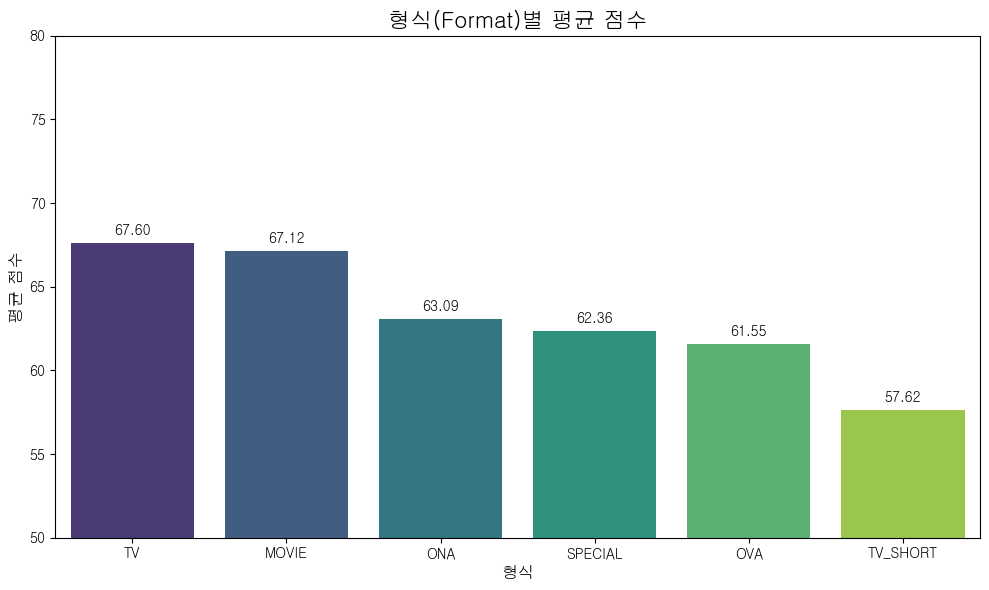

### 5.2. 장르 개수와 품질 분석 (Box Plot)
- 시각화: 장르 개수 그룹별 평균 점수 분포 (Box Plot)
- 상관계수: 장르 개수 ↔ 평균 점수 상관계수: 매우 낮은 음의 상관관계 (약 -0.1 미만)
- 그룹 비교:
    * 장르 개수가 1~3개인 작품들이 평균 점수의 중앙값(Median)이 가장 높고 점수 분포의 폭이 좁습니다.
    * 이는 장르를 좁게 가져가며 특정 서사에 집중하는 '선택과 집중' 전략이 대중적인 성공보다는 비평적 성공 및 높은 팬 만족도에 더 유리함을 보여줍니다.

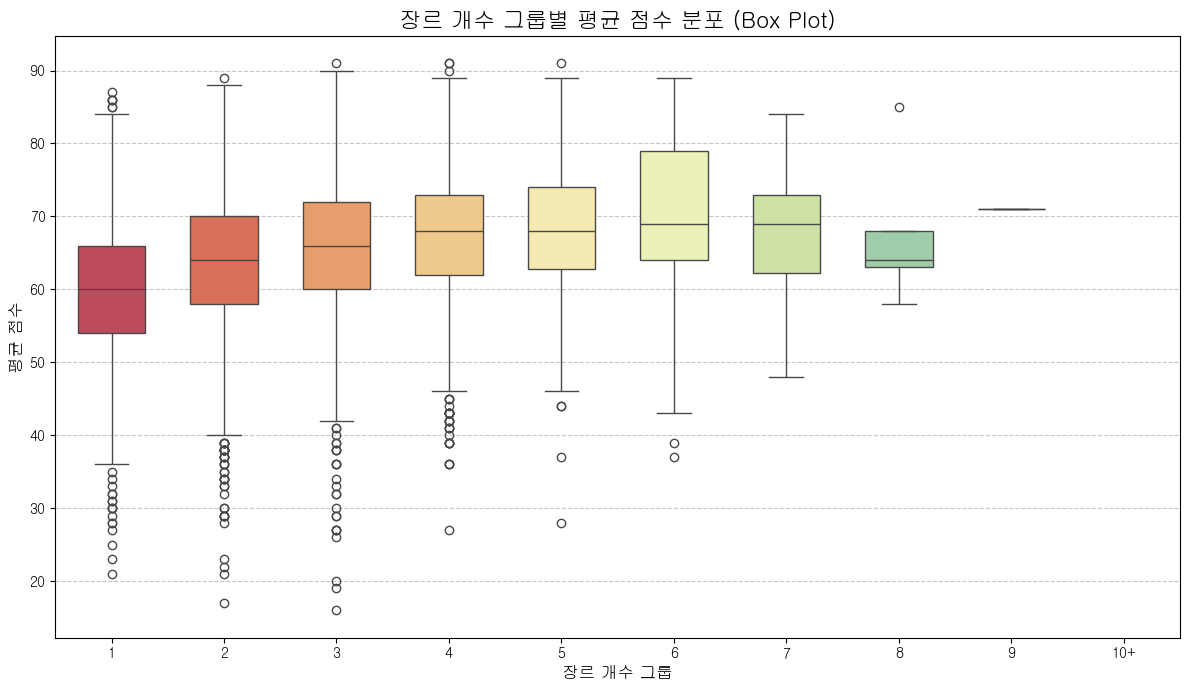

### 5.3. 장르별 평균 점수 및 작품 수 (결합 차트 - Top 10)
- 시각화: 장르별 평균 점수와 작품 수 (Dual Axis Chart)
- 상관분석: (N/A - 장르 자체는 범주형)
- 그룹 비교:
    * 고품질 니치 장르 그룹: Suspense, Psychological, Historical 등은 작품 수가 상대적으로 적지만 평균 점수가 높습니다. 이는 하드코어 팬층으로부터 높은 평가를 받는 경향을 반영합니다.
    * 대중 시장 장르 그룹: Action, Comedy 등 작품 수가 많은 장르는 품질 편차가 커서 평균 점수가 중위권에 위치하며, 낮은 진입 장벽과 높은 물량을 특징으로 합니다.

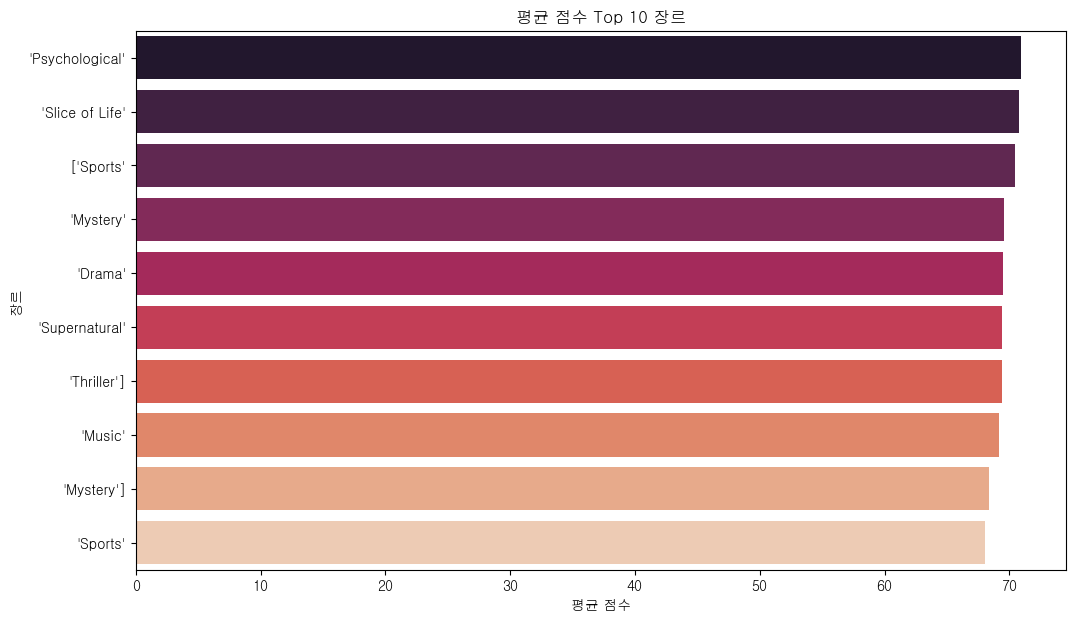

### 5.4. 흥행 지표 간 상관 분석 (히트맵)
- 시각화: 주요 수치형 변수 간 상관관계 히트맵 ``
- 상관분석:
    * popularity ↔ favourites 간 강한 양의 상관관계 (약 +0.90 이상)
    * averageScore ↔ popularity 및 favourites 간 약한 상관관계
- 그룹 비교: (N/A - 주로 수치형 변수 간 상관성을 분석)
- 인사이트: 작품의 품질(averageScore)은 인기도나 선호도와 독립적으로 움직입니다. 즉, 흥행은 **품질 외적인 요소(원작, 마케팅, 화제성)**의 영향을 더 크게 받습니다.

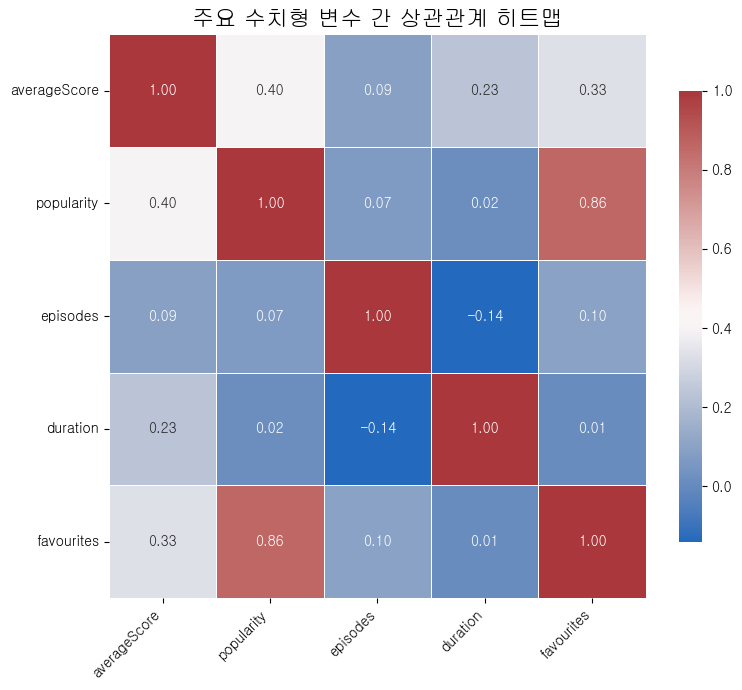

### 5.5. 제작사 규모와 품질 분석 (Violin Plot)
- 시각화: 제작사 규모별 평균 점수 분포 (Violin Plot)
- 상관분석: 제작사 규모(작품 수) ↔ 평균 점수(averageScore) 간 매우 낮은 음의 상관관계 (약 -0.05 미만)
- 그룹 비교:
    * Small/Medium 그룹: 점수 분포가 좁고 중앙값이 높아 품질 일관성이 높습니다.
    * Extra Large (상위 25%) 그룹: 점수 분포의 폭이 가장 넓고 평평하며, 이는 대형 제작사의 품질 일관성이 상대적으로 떨어진다는 것을 의미합니다. 대형 제작사의 다작으로 인한 리소스 분산 현상을 시사합니다.

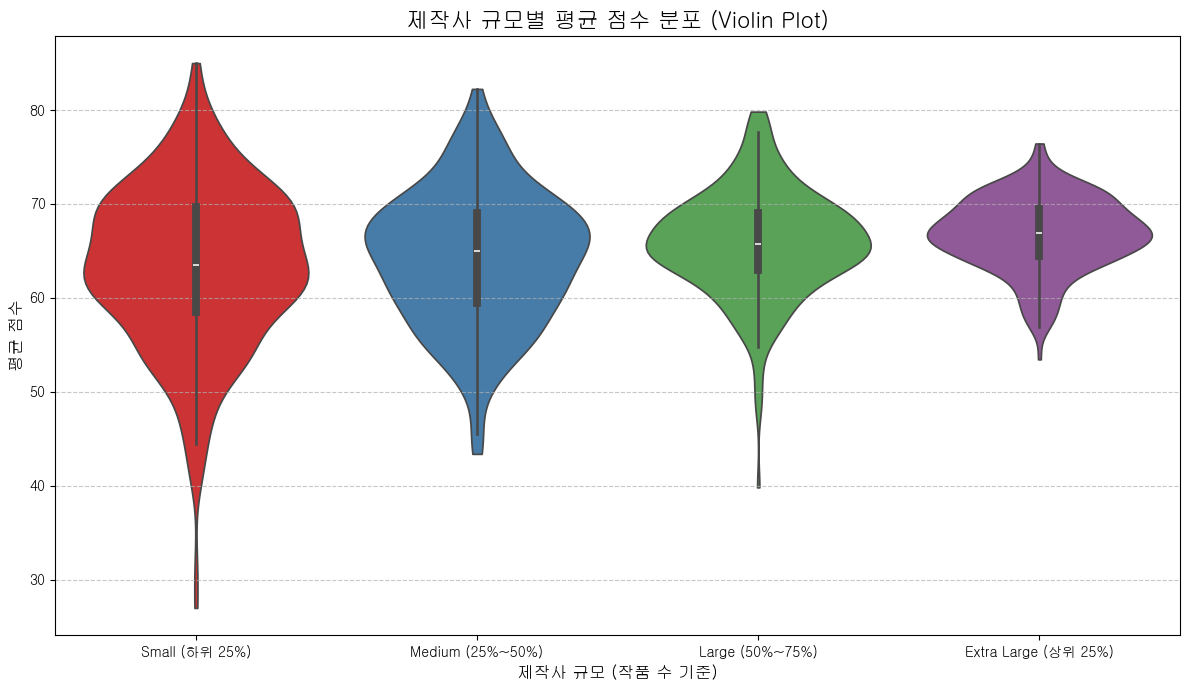

#### 6. 요약 및 인사이트 도출
1. 시장 동향: 애니메이션 산업은 지난 10~20년간 폭발적으로 성장했으며, 현재는 TV 시리즈 외 ONA(Original Net Animation) 형식이 OTT 플랫폼의 투자에 힘입어 빠른 속도로 품질과 비중을 높이며 주류 포맷으로 부상하고 있습니다.

2. 품질 vs. 흥행: 작품의 품질(averageScore)은 인기도나 선호도와 약한 상관관계를 가지며, 흥행은 마케팅, 원작의 명성, 화제성과 같은 품질 외적인 요소의 영향을 더 크게 받습니다.

3. 콘텐츠 전략:
    * 대중성 확보: Action, Comedy 등 주류 장르는 여전히 시장의 큰 파이를 차지합니다.
    * 고품질 확보: 장르를 1~3개로 집중하고, Suspense, Psychological과 같은 니치 장르로 접근하는 것이 높은 비평적 만족도를 확보하는 데 유리할 수 있습니다.
4. 제작사 양극화: 대형 제작사는 다작으로 인해 품질 일관성이 떨어지는 반면, 중소형 제작사는 특정 프로젝트에 집중하여 높은 품질의 콘텐츠를 만들 가능성을 보였습니다.